In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset using pandas
dataset = np.loadtxt("../data/pima-indians-diabetes.data.csv", delimiter=",")
df = pd.read_csv("../data/pima-indians-diabetes.data.csv", delimiter=",")

FileNotFoundError: ../data/pima-indians-diabetes.data.csv not found.

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8
0,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0,0.0
1,7.0,181.0,84.0,21.0,192.0,35.9,0.586,51.0,1.0
2,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0,1.0
3,6.0,93.0,50.0,30.0,64.0,28.7,0.356,23.0,0.0
4,6.0,125.0,78.0,31.0,0.0,27.6,0.565,49.0,1.0
...,...,...,...,...,...,...,...,...,...
763,2.0,197.0,70.0,99.0,0.0,34.7,0.575,62.0,1.0
764,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,1.0
765,0.0,57.0,60.0,0.0,0.0,21.7,0.735,67.0,0.0
766,1.0,105.0,58.0,0.0,0.0,24.3,0.187,21.0,0.0


In [ ]:
np.random.seed(7)
np.random.shuffle(dataset)

In [ ]:
# Split the dataset into input (X) and output (Y) variables
splitratio = 0.8
X_train = dataset[:int(len(dataset)*splitratio), 0:8]
X_val = dataset[int(len(dataset)*splitratio):, 0:8]
Y_train = dataset[:int(len(dataset)*splitratio), 8]
Y_val = dataset[int(len(dataset)*splitratio):, 8]

In [ ]:
def distance(one, two):
    return np.linalg.norm(one - two)

In [ ]:
def get_k_nearest_neighbors(x, X_train, Y_train, k):
    distances = [distance(x, X_train[i]) for i in range(len(X_train))]
    sorted_indices = np.argsort(distances)
    top_k_indices = sorted_indices[:k]
    top_k_labels = Y_train[top_k_indices]
    return top_k_labels

def predict_class(x, X_train, Y_train, k):
    neighbors = get_k_nearest_neighbors(x, X_train, Y_train, k)
    return np.argmax(np.bincount(neighbors.astype(int)))

def knn_predict(X_val, X_train, Y_train, k):
    predictions = []
    for x in X_val:
        predictions.append(predict_class(x, X_train, Y_train, k))
    return np.array(predictions)


In [ ]:
def calculate_precision(TP, FP):
    return TP / (TP + FP)

def calculate_recall(TP, FN):
    return TP / (TP + FN)

def calculate_accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def calculate_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

def calculate_mse(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

def calculate_metrics(Y_true, Y_pred):
    TP = np.sum((Y_true == 1) & (Y_pred == 1))
    TN = np.sum((Y_true == 0) & (Y_pred == 0))
    FP = np.sum((Y_true == 0) & (Y_pred == 1))
    FN = np.sum((Y_true == 1) & (Y_pred == 0))
    
    accuracy = calculate_accuracy(TP, TN, FP, FN)
    precision = calculate_precision(TP, FP)
    recall = calculate_recall(TP, FN)
    f1 = calculate_f1(precision, recall)
    
    return accuracy, precision, recall, f1


In [ ]:
distances = [distance(X_val, X_train[i]) for i in range(len(X_train))]

In [ ]:
distances

[np.float64(1698.560968343792),
 np.float64(2271.8193802045535),
 np.float64(1805.230485143933),
 np.float64(1655.6135565079792),
 np.float64(1901.8533221468474),
 np.float64(1904.286861951476),
 np.float64(1902.1808027474676),
 np.float64(1921.4423172692434),
 np.float64(1848.4531065669478),
 np.float64(1837.563685122505),
 np.float64(2155.105004280998),
 np.float64(1702.3463597861044),
 np.float64(2147.9627252308173),
 np.float64(2011.8858931552256),
 np.float64(1921.4782922731654),
 np.float64(1912.1282495253818),
 np.float64(1621.6543136787816),
 np.float64(1881.828552853049),
 np.float64(3070.787072053841),
 np.float64(1924.638553511022),
 np.float64(2911.6444172668134),
 np.float64(2182.333725657238),
 np.float64(3269.95046865438),
 np.float64(9678.853921581884),
 np.float64(1670.2037239453757),
 np.float64(1627.11031118391),
 np.float64(1664.3989935039613),
 np.float64(1935.2604234192877),
 np.float64(3839.751329322382),
 np.float64(1895.8228223863641),
 np.float64(1897.12006729

In [ ]:
k_values = range(1, 151)
tns, tps, fns, fps = [], [], [], []
accuracies, precisions, recalls, f1_scores = [], [], [], []
mses, rmses = [], []

for k in k_values:
    Y_pred = knn_predict(X_val, X_train, Y_train, k)
    
    # Confusion matrix components
    TP = np.sum((Y_val == 1) & (Y_pred == 1))
    TN = np.sum((Y_val == 0) & (Y_pred == 0))
    FP = np.sum((Y_val == 0) & (Y_pred == 1))
    FN = np.sum((Y_val == 1) & (Y_pred == 0))
    
    tns.append(TN)
    tps.append(TP)
    fps.append(FP)
    fns.append(FN)
    
    # Performance metrics
    accuracy = calculate_accuracy(TP, TN, FP, FN)
    precision = calculate_precision(TP, FP)
    recall = calculate_recall(TP, FN)
    f1 = calculate_f1(precision, recall)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Error metrics
    mse = calculate_mse(Y_val, Y_pred)
    rmse = np.sqrt(mse)
    
    mses.append(mse)
    rmses.append(rmse)




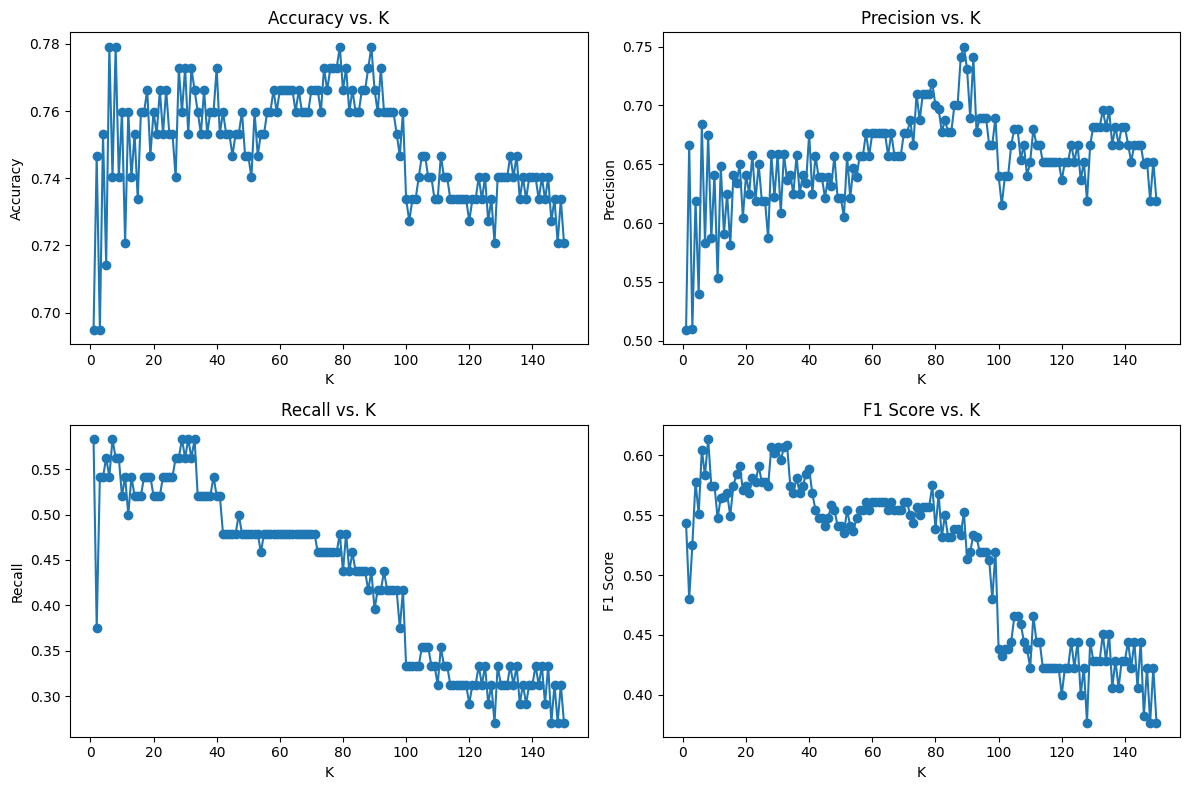

In [ ]:
# Plot accuracy, precision, recall, and F1 score
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(k_values, precisions, marker='o')
plt.title('Precision vs. K')
plt.xlabel('K')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.plot(k_values, recalls, marker='o')
plt.title('Recall vs. K')
plt.xlabel('K')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1 Score vs. K')
plt.xlabel('K')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

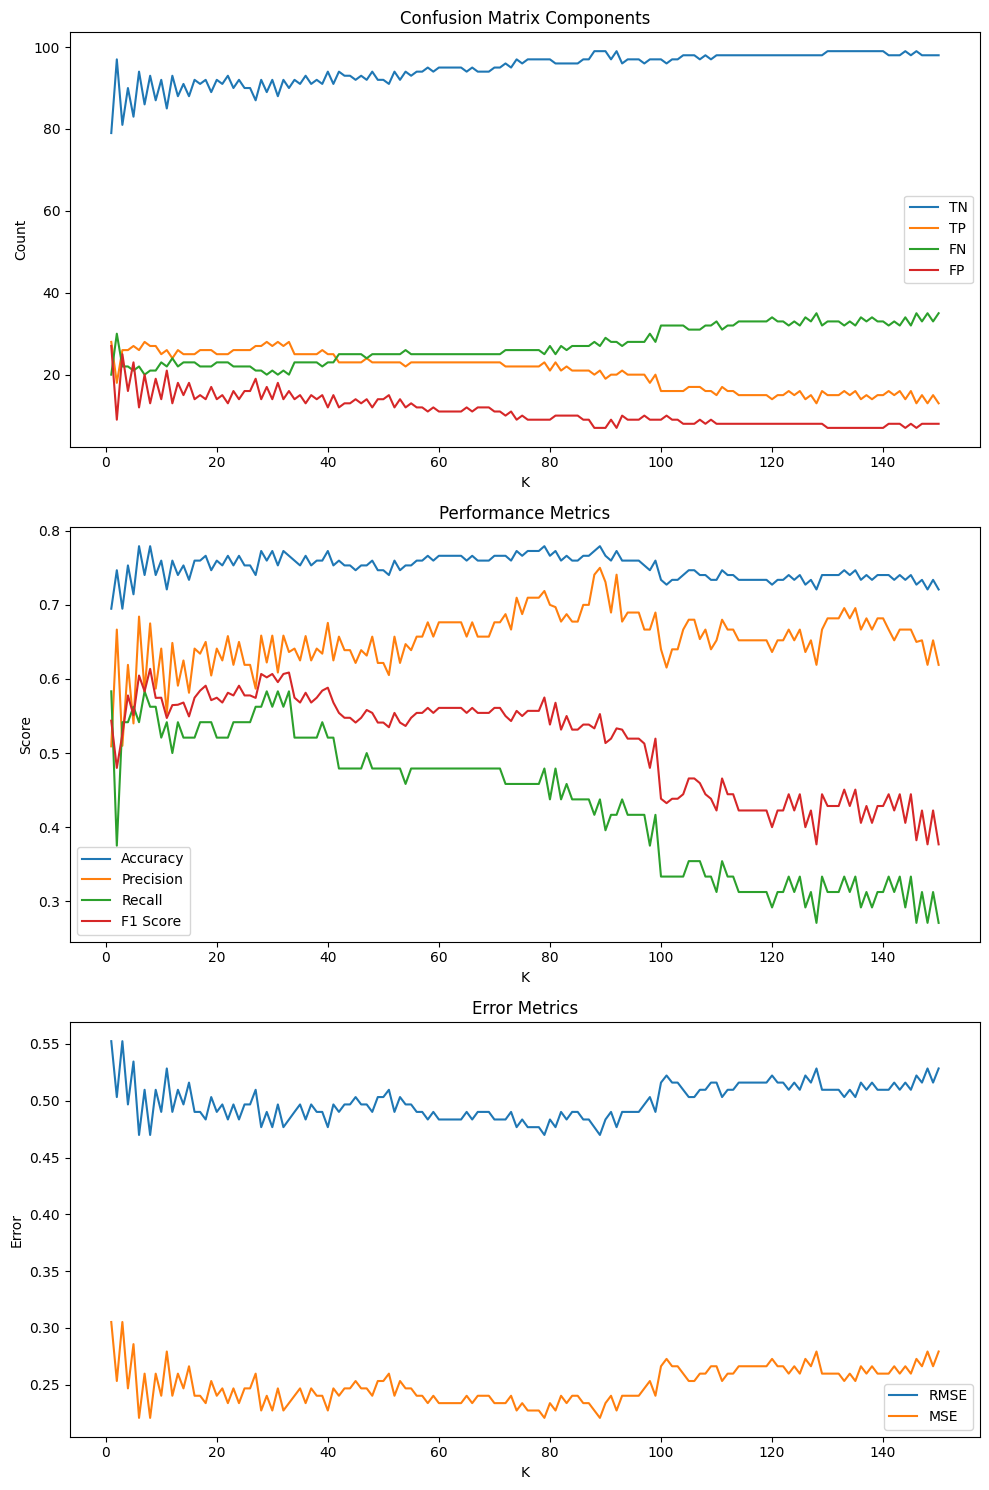

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))

# Plot Confusion Matrix Components
plt.subplot(3, 1, 1)
plt.plot(k_values, tns, label='TN')
plt.plot(k_values, tps, label='TP')
plt.plot(k_values, fns, label='FN')
plt.plot(k_values, fps, label='FP')
plt.title('Confusion Matrix Components')
plt.xlabel('K')
plt.ylabel('Count')
plt.legend()

# Plot Performance Metrics
plt.subplot(3, 1, 2)
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.title('Performance Metrics')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()

# Plot Error Metrics
plt.subplot(3, 1, 3)
plt.plot(k_values, rmses, label='RMSE')
plt.plot(k_values, mses, label='MSE')
plt.title('Error Metrics')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Find the K that gives the best F1 Score
optimal_k = k_values[np.argmax(f1_scores)]
print(f"The optimal value of K based on F1 Score is: {optimal_k}")

The optimal value of K based on F1 Score is: 8


In [ ]:
# Find the best K (e.g., the one with the highest F1 Score)
best_k = k_values[np.argmax(f1_scores)]
Y_pred_best = knn_predict(X_val, X_train, Y_train, best_k)

TP = np.sum((Y_val == 1) & (Y_pred_best == 1))
TN = np.sum((Y_val == 0) & (Y_pred_best == 0))
FP = np.sum((Y_val == 0) & (Y_pred_best == 1))
FN = np.sum((Y_val == 1) & (Y_pred_best == 0))

conf_matrix = np.array([[TP, FN], [FP, TN]])
print(f"Confusion Matrix for K={best_k}:\n", conf_matrix)


Confusion Matrix for K=8:
 [[27 21]
 [13 93]]


In [ ]:
mse_best = calculate_mse(Y_val, Y_pred_best)
print(f"Mean Squared Error for K={best_k}: {mse_best}")


Mean Squared Error for K=8: 0.22077922077922077
